In [625]:
### Import the necessary modules
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split


In [612]:
### Basic setting
LOG_SCALE   = False # response scale
RANDOM_SEED = 33    # random seed


In [613]:
### Set the random seed
import os
import random

seed = RANDOM_SEED
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [614]:
### Read csv data file
df_1= pd.read_csv("real_estate_1.csv")
df_2 = pd.read_csv("real_estate_2.csv")

# print(df_1.columns)
# print(df_2.columns)

In [615]:
### Divide datasets into training set and testing set
X_1 = df_1
X_2 = df_2.drop('Y house price of unit area', axis=1)

if LOG_SCALE:
    Y = np.log(df_2['Y house price of unit area'])
else:
    Y = df_2['Y house price of unit area']

X_1_train, X_1_test, X_2_train, X_2_test, Y_train, Y_test = train_test_split(X_1, X_2, Y, test_size=0.3, random_state=40)


In [623]:
### Define input layers
ilayer_1 = Input(shape=(3,))
ilayer_2 = Input(shape=(3,))
ilayer   = keras.layers.concatenate(axis=1,inputs=[ilayer_1,ilayer_2])


In [617]:
### Define hidden/output layers and connection
# # MSE(log): 0.151 (63.3)
# hlayer_1 = Dense(units=32, activation='relu')(ilayer)
# hlayer_2 = Dense(units=64, activation='relu')(hlayer_1)
# hlayer_3 = Dense(units=32, activation='relu')(hlayer_2)
# olayer   = Dense(units=1)(hlayer_3)

# # MSE(log): 0.041 (84.6 when learning_rate = s3)
# hlayer_1 = Dense(units=32, activation='relu')(ilayer)
# hlayer_2 = Dense(units=64, activation='relu')(hlayer_1)
# hlayer_3 = Dense(units=32, activation='tanh')(hlayer_2)
# olayer   = Dense(units=1)(hlayer_3)

# MSE(log): 0.0356 (57.9)
hlayer_1 = Dense(units=32, activation='tanh')(ilayer)
hlayer_2 = Dense(units=64, activation='relu')(hlayer_1)
hlayer_3 = Dense(units=128, activation='relu')(hlayer_2)
hlayer_4 = Dense(units=64, activation='relu')(hlayer_3)
hlayer_5 = Dense(units=32, activation='tanh')(hlayer_4)
olayer   = Dense(units=1)(hlayer_5)

# # MSE(log): 0.0372 (61.9)
# hlayer_1 = Dense(units=32, activation='tanh')(ilayer)
# hlayer_2 = Dense(units=64, activation='relu')(hlayer_1)
# hlayer_3 = Dense(units=32, activation='tanh')(hlayer_2)
# olayer   = Dense(units=1)(hlayer_3)

# Declare variable my_model
my_model = Model(inputs=[ilayer_1,ilayer_2], outputs=[olayer])


In [618]:
### Define optimizer for training
from keras import optimizers
if LOG_SCALE:
    LEARNING_RATE = 0.0007
    adam = optimizers.Adam(learning_rate=LEARNING_RATE)
else:
    adam = optimizers.Adam()
    

In [619]:
### Compile the defined NN model
my_model.compile(loss='mse', optimizer=adam)

# my_model.summary()

In [620]:
### Fit the model on the train data with a validation split of 0.2
EPOCHS      = 100
BATCH_SIZE  = 8
V_SPLIT     = 0.2

history = my_model.fit(
   x = [X_1_train, X_2_train],
   y = Y_train,
   epochs = EPOCHS,
   batch_size = BATCH_SIZE,
   validation_split = V_SPLIT,
)


Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 1358.6305 - val_loss: 1108.5802
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 1121.7994 - val_loss: 1024.7795
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 1052.6989 - val_loss: 966.4978
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 993.1430 - val_loss: 912.8329
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 938.9793 - val_loss: 862.1327
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 887.5898 - val_loss: 815.7872
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 839.8182 - val_loss: 772.1144
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 795.1717 - val_loss: 730.1283
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 752.5716 - val_loss: 691.5629
Epoch 10/100
29/29 [==============================] - 0s 3ms/step -

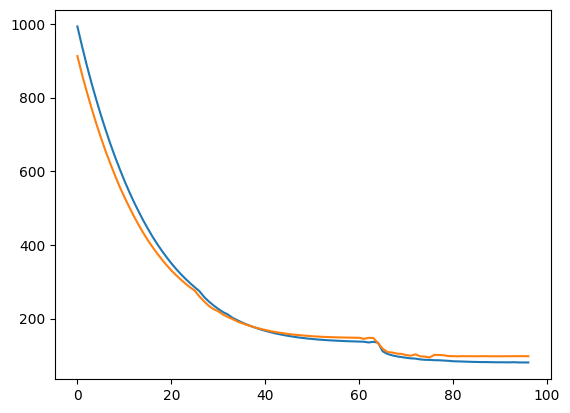

In [621]:
# Plot the training and validation loss as a function of the number of epochs used to train
plt.plot(history.history['loss'][3:], label='loss')
plt.plot(history.history['val_loss'][3:], label='val_loss')
plt.show()


In [622]:
# Print the train and validation MSE
# Predict the model on the test data
test_prediction = my_model.predict([X_1_test,X_2_test])

from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(Y_test, test_prediction)}")


4/4 [==============================] - 0s 2ms/step
MSE: 57.94722600090417
